In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('mut_fund.csv')
df1=pd.read_csv('mut_fund_sum.csv')

C:\Users\19785\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2714: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\19785\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2714: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#filter out specific mutual funds
mask = (df1['lipper_class'] == 'SCVE')
mask1 = (df1['lipper_obj_name'] == 'SMALL-CAP FUNDS')
df1 = df1[mask & mask1]

In [4]:
#merge out two dataframe to get a comprehensive dataframe that has return and information
df_new = df.merge(df1, left_on=['crsp_fundno', 'caldt'], right_on=['crsp_fundno', 'caldt'])
mask = df_new['per_com'].notnull()
df_new = df_new[mask]

In [5]:
#create a year column to pull out specific years
df_new['date']=pd.to_datetime(df_new['caldt'])
df_new['date'] = df_new['date'].map(lambda x: 100*x.year + x.month)
df_new['date']=df_new['date'].map(lambda x:str(x)[:4])

In [6]:
#transform data and filter out values

df_new['mtna'] = pd.to_numeric(df_new['mtna'],errors='coerce')
mask1 = (df_new['mret'] != '0.000000')
mask2 = (df_new['mtna'] != -99)
df_new = df_new[mask1 & mask2]

In [7]:
#Go year to year and filter our mutual funds by size and then by return
#we printed out each quantiles information to see how the sizes changed over time and to get an idea of what the quantiles
#represented
mask=df_new['date']=='2008'
df2008=df_new[mask]
rank = df2008['mtna'].rank(ascending=False)

percentile = pd.qcut(rank,
                                10,
                                labels=['0-10', '10-20', '20-30',
                                        '30-40', '40-50', '50-60',
                                        '60-70', '70-80', '80-90', '90-100'])
df2008['percentile'] = percentile

df2008['2008'] = df2008['mret'].astype(float)
y2008 = df2008.groupby(['percentile'])[['2008']].agg('mean')
stuff = df2008.groupby(['percentile'])[['mtna']].agg([min, max])
stuff

C:\Users\19785\Anaconda2\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\19785\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


mtna        
              min     max
percentile               
0-10        351.2  7761.1
10-20       156.2   351.1
20-30        71.5   155.4
30-40        37.7    71.3
40-50        20.8    37.4
50-60        11.6    20.7
60-70         5.6    11.5
70-80         2.6     5.5
80-90         0.5     2.5
90-100        0.0     0.4

In [8]:
mask=df_new['date']=='2009'
mask1 = (df_new['mret'] != 'R')

df2009=df_new[mask&mask1]
rank = df2009['mtna'].rank(ascending=False)

percentile = pd.qcut(rank,
                                10,
                                labels=['0-10', '10-20', '20-30',
                                        '30-40', '40-50', '50-60',
                                        '60-70', '70-80', '80-90', '90-100'])
df2009['percentile'] = percentile

df2009['2009'] = df2009['mret'].astype(float)
y2009 = df2009.groupby(['percentile'])[['2009']].agg('mean')
stuff = df2009.groupby(['percentile'])[['mtna']].agg([min, max])
stuff

C:\Users\19785\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\19785\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


mtna        
              min     max
percentile               
0-10        345.3  6203.9
10-20       162.3   341.9
20-30        77.4   162.1
30-40        46.4    76.8
40-50        24.2    46.3
50-60        12.9    24.1
60-70         6.5    12.8
70-80         2.5     6.4
80-90         0.5     2.4
90-100        0.1     0.4

In [9]:
mask=df_new['date']=='2010'
mask1 = (df_new['mret'] != 'R')

df2010=df_new[mask & mask1]
rank = df2010['mtna'].rank(ascending=False)

percentile = pd.qcut(rank,
                                10,
                                labels=['0-10', '10-20', '20-30',
                                        '30-40', '40-50', '50-60',
                                        '60-70', '70-80', '80-90', '90-100'])
df2010['percentile'] = percentile

df2010['2010'] = df2010['mret'].astype(float)
y2010 = df2010.groupby(['percentile'])[['2010']].agg('mean')
stuff = df2010.groupby(['percentile'])[['mtna']].agg([min, max])
stuff

C:\Users\19785\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\19785\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


mtna        
              min     max
percentile               
0-10        483.6  7335.4
10-20       202.8   475.1
20-30       114.0   202.5
30-40        57.1   111.3
40-50        29.1    56.2
50-60        13.9    29.0
60-70         6.2    13.8
70-80         2.3     6.1
80-90         0.5     2.2
90-100        0.1     0.4

In [10]:
mask=df_new['date']=='2011'
mask1 = (df_new['mret'] != 'R')

df2011=df_new[mask & mask1]
rank = df2011['mtna'].rank(ascending=False)

percentile = pd.qcut(rank,
                                10,
                                labels=['0-10', '10-20', '20-30',
                                        '30-40', '40-50', '50-60',
                                        '60-70', '70-80', '80-90', '90-100'])
df2011['percentile'] = percentile

df2011['2011'] = df2011['mret'].astype(float)
y2011 = df2011.groupby(['percentile'])[['2011']].agg('mean')
stuff = df2011.groupby(['percentile'])[['mtna']].agg([min, max])
stuff

C:\Users\19785\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\19785\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


mtna        
              min     max
percentile               
0-10        499.7  7941.8
10-20       201.5   492.3
20-30        93.9   201.0
30-40        51.7    93.8
40-50        25.1    50.5
50-60        11.9    25.0
60-70         5.9    11.8
70-80         2.1     5.8
80-90         0.7     2.0
90-100        0.1     0.6

In [11]:
mask=df_new['date']=='2012'
mask1 = (df_new['mret'] != 'R')

df2012=df_new[mask & mask1]
rank = df2012['mtna'].rank(ascending=False)

percentile = pd.qcut(rank,
                                10,
                                labels=['0-10', '10-20', '20-30',
                                        '30-40', '40-50', '50-60',
                                        '60-70', '70-80', '80-90', '90-100'])
df2012['percentile'] = percentile

df2012['2012'] = df2012['mret'].astype(float)
y2012 = df2012.groupby(['percentile'])[['2012']].agg('mean')
stuff = df2012.groupby(['percentile'])[['mtna']].agg([min, max])
stuff

C:\Users\19785\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\19785\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


mtna        
              min     max
percentile               
0-10        664.5  7342.7
10-20       233.6   652.8
20-30       128.8   231.2
30-40        61.0   128.1
40-50        30.4    60.9
50-60        14.1    30.0
60-70         7.1    13.9
70-80         2.8     7.0
80-90         0.8     2.7
90-100        0.1     0.7

In [12]:
mask=df_new['date']=='2013'
mask1 = (df_new['mret'] != 'R')

df2013=df_new[mask & mask1]
rank = df2013['mtna'].rank(ascending=False)

percentile = pd.qcut(rank,
                                10,
                                labels=['0-10', '10-20', '20-30',
                                        '30-40', '40-50', '50-60',
                                        '60-70', '70-80', '80-90', '90-100'])
df2013['percentile'] = percentile

df2013['2013'] = df2013['mret'].astype(float)
y2013 = df2013.groupby(['percentile'])[['2013']].agg('mean')
stuff = df2013.groupby(['percentile'])[['mtna']].agg([min, max])
stuff

C:\Users\19785\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\19785\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


mtna         
              min      max
percentile                
0-10        853.9  10249.0
10-20       275.5    850.1
20-30       145.0    275.3
30-40        79.5    143.9
40-50        37.2     79.2
50-60        19.0     37.1
60-70         9.0     18.7
70-80         3.1      8.9
80-90         0.9      3.0
90-100        0.1      0.8

In [13]:
mask=df_new['date']=='2014'
mask1 = (df_new['mret'] != 'R')

df2014=df_new[mask & mask1]
rank = df2014['mtna'].rank(ascending=False)

percentile = pd.qcut(rank,
                                10,
                                labels=['0-10', '10-20', '20-30',
                                        '30-40', '40-50', '50-60',
                                        '60-70', '70-80', '80-90', '90-100'])
df2014['percentile'] = percentile

df2014['2014'] = df2014['mret'].astype(float)
y2014 = df2014.groupby(['percentile'])[['2014']].agg('mean')
stuff = df2014.groupby(['percentile'])[['mtna']].agg([min, max])
stuff

C:\Users\19785\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\19785\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


mtna         
              min      max
percentile                
0-10        853.9  11680.7
10-20       318.3    853.0
20-30       168.3    313.0
30-40        87.5    168.2
40-50        53.8     87.3
50-60        23.5     53.7
60-70        10.1     23.3
70-80         3.4      9.8
80-90         0.9      3.3
90-100        0.1      0.8

In [14]:
mask=df_new['date']=='2015'
mask1 = (df_new['mret'] != 'R')

df2015=df_new[mask & mask1]
rank = df2015['mtna'].rank(ascending=False)

percentile = pd.qcut(rank,
                                10,
                                labels=['0-10', '10-20', '20-30',
                                        '30-40', '40-50', '50-60',
                                        '60-70', '70-80', '80-90', '90-100'])
df2015['percentile'] = percentile

df2015['2015'] = df2015['mret'].astype(float)
y2015 = df2015.groupby(['percentile'])[['2015']].agg('mean')
stuff = df2015.groupby(['percentile'])[['mtna']].agg([min, max])
stuff

C:\Users\19785\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\19785\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


mtna         
              min      max
percentile                
0-10        798.7  12430.5
10-20       311.6    790.6
20-30       168.4    310.9
30-40        95.7    167.3
40-50        59.0     95.4
50-60        26.2     58.9
60-70        10.3     25.9
70-80         3.4     10.2
80-90         0.5      3.3
90-100        0.1      0.4

In [15]:
mask=df_new['date']=='2016'
mask1 = (df_new['mret'] != 'R')

df2016=df_new[mask & mask1]
rank = df2016['mtna'].rank(ascending=False)

percentile = pd.qcut(rank,
                                10,
                                labels=['0-10', '10-20', '20-30',
                                        '30-40', '40-50', '50-60',
                                        '60-70', '70-80', '80-90', '90-100'])
df2016['percentile'] = percentile

df2016['2016'] = df2016['mret'].astype(float)
y2016 = df2016.groupby(['percentile'])[['2016']].agg('mean')
stuff = df2016.groupby(['percentile'])[['mtna']].agg([min, max])
stuff

C:\Users\19785\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\19785\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


mtna         
              min      max
percentile                
0-10        643.7  14576.7
10-20       271.1    639.3
20-30       157.6    268.6
30-40        97.0    157.2
40-50        58.7     96.9
50-60        24.7     58.5
60-70         9.5     24.6
70-80         3.2      9.4
80-90         0.6      3.1
90-100        0.1      0.5

In [16]:
mask=df_new['date']=='2017'
mask1 = (df_new['mret'] != 'R')

df2017=df_new[mask & mask1]
rank = df2017['mtna'].rank(ascending=False)

percentile = pd.qcut(rank,
                                10,
                                labels=['0-10', '10-20', '20-30',
                                        '30-40', '40-50', '50-60',
                                        '60-70', '70-80', '80-90', '90-100'])
df2017['percentile'] = percentile

df2017['2017'] = df2017[['mret']].astype(float)
y2017 = df2017.groupby(['percentile'])[['2017']].agg('mean')
stuff = df2017.groupby(['percentile'])[['mtna']].agg([min, max])
stuff

C:\Users\19785\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\19785\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


mtna         
              min      max
percentile                
0-10        709.0  15189.9
10-20       293.7    706.1
20-30       158.4    292.4
30-40        89.1    158.2
40-50        51.8     88.4
50-60        22.3     51.1
60-70         9.3     22.2
70-80         3.0      9.2
80-90         0.6      2.9
90-100        0.1      0.5

In [21]:
mask=df_new['date']=='2018'
mask1 = (df_new['mret'] != 'R')

df2018=df_new[mask & mask1]
rank = df2018['mtna'].rank(ascending=False)

percentile = pd.qcut(rank,
                                10,
                                labels=['0-10', '10-20', '20-30',
                                        '30-40', '40-50', '50-60',
                                        '60-70', '70-80', '80-90', '90-100'])
df2018['percentile'] = percentile

df2018['2018'] = pd.to_numeric(df2018['mret'],errors='coerce')
y2018 = df2018.groupby(['percentile'])[['2018']].agg('mean')
stuff = df2018.groupby(['percentile'])[['mtna']].agg([min, max])
stuff

C:\Users\19785\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\19785\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


mtna         
              min      max
percentile                
0-10        720.5  16245.5
10-20       332.5    714.9
20-30       144.6    329.9
30-40        76.7    142.4
40-50        40.6     76.6
50-60        22.1     40.2
60-70        10.7     21.6
70-80         3.3     10.6
80-90         0.5      3.2
90-100        0.1      0.4

Populating the interactive namespace from numpy and matplotlib


C:\Users\19785\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['percentile', 'rank']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


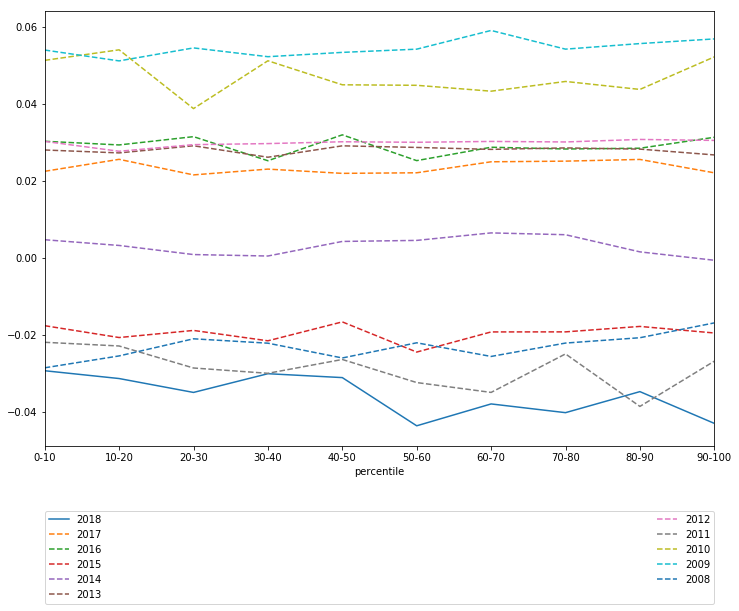

In [18]:
#plot our graph with yearly data
%pylab inline
plt.figure(figsize=(12,8))

ax = y2018['2018'].plot()
y2017['2017'].plot(ax=ax, linestyle='--')
y2016['2016'].plot(ax=ax, linestyle='--')
y2015['2015'].plot(ax=ax, linestyle='--')
y2014['2014'].plot(ax=ax, linestyle='--')
y2013['2013'].plot(ax=ax, linestyle='--')
y2012['2012'].plot(ax=ax, linestyle='--')
y2011['2011'].plot(ax=ax, linestyle='--')
y2010['2010'].plot(ax=ax, linestyle='--')
y2009['2009'].plot(ax=ax, linestyle='--')
y2008['2008'].plot(ax=ax, linestyle='--')
plt.legend(bbox_to_anchor=(0, -0.15, 1, 0), loc=2, ncol=2, mode="expand", borderaxespad=0)